In [1]:

import pandas as pd
import numpy as np
import random 
from sklearn.preprocessing import LabelEncoder
import optuna
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

CSV_PATH="cleaned_songs.csv"
df=pd.read_csv(CSV_PATH)
random_seed=47

/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-09-24 21:10:11.142279: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-24 21:10:11.176220: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/google/protobuf/runtime_version.py:98: UserWarning: 

In [2]:
df

,author,context,additional_context,song_title,song_text,source
0,Петре М. Андреевски,"Петок е прекрасен ден за читање поезија, па за...",NaN,Наопачно оро,Наопачно оро – Петре М. Андреевски\n\nКој игра...,song_kafe_kniga
1,Кочо Рацин,На 13 јуни 1943 година загинал Кочо Рацин. И п...,NaN,Балада за непознатиот,Балада за непознатиот – Кочо Рацин\n\nНатаму –...,song_kafe_kniga
2,Гане Тодоровски,На 22 мај 2010 година починал еден од најголем...,NaN,Молитва,Молитва – Гане Тодоровски\n\n(пред крајот на г...,song_kafe_kniga
3,Владо Урошевиќ,Денес на блогот читаме прекрасни македонски ст...,NaN,Слобода,Слобода – Влада Урошевиќ\n\nПтица со пет крила...,song_kafe_kniga
4,Кочо Рацин,"Денес е 1 Мај, Меѓународен ден на трудот. Во т...",NaN,Копачите,Копачите – Кочо Рацин\n\nСе к’ти ноќта црна!\n...,song_kafe_kniga
...,...,...,...,...,...,...
1194,Ристо Лазаров,NaN,Аргетинци,ЕВИТА,ЕВИТА \n \nветриштата од западните пампаси \...,СРЕДЕ
1195,Ристо Лазаров,NaN,Аргетинци,ГАРДЕЛ,ГАРДЕЛ \n \nа зина уста \nа птици ќе си ги рас...,СРЕДЕ
1196,Ристо Лазаров,NaN,Аргетинци,БОРХЕС,БОРХЕС \n \nза жал светот с# уште е стварен \...,СРЕДЕ
1197,Ристо Лазаров,NaN,Аргетинци,САБАТО,САБАТО \n \nво сантос лагоресу законите на фи...,СРЕДЕ


author
Блаже Конески           182
Пијан Славеј            160
Ефтим Клетников         135
Славко Јаневски          70
Владо Урошевиќ           61
Катица Ќулавкова         60
Братислав Ташковски      55
Веле Смилевски           51
Ристо Лазаров            48
Адам Гајтани             47
Бранко Цветкоски         41
Петре М. Андреевски      41
Милош Линдро             40
Тодор Чаловски           31
Ацо Шопов                31
Анте Поповски            21
Гане Тодоровски          19
Богомил Ѓузел            19
Игор Исаковски           15
Матеја Матевски          14
Кочо Рацин               13
Лилјана Дирјан            7
Јосип Коцев               6
Ацо Караманов             4
Тихомир Јанчовски         4
Коле Неделковски          4
Видое Подгорец            3
Раде Силјан               3
Константин Миладинов      3
Цане Андреевски           2
Ванчо Николески           2
Никола Вапцаров           2
Рајко Жинзифов            1
Никола Маџиров            1
Јован Котески             1
Радован Павло

/tmp/ipykernel_496441/1049885675.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=author_counts.index, y=author_counts.values, palette="viridis")


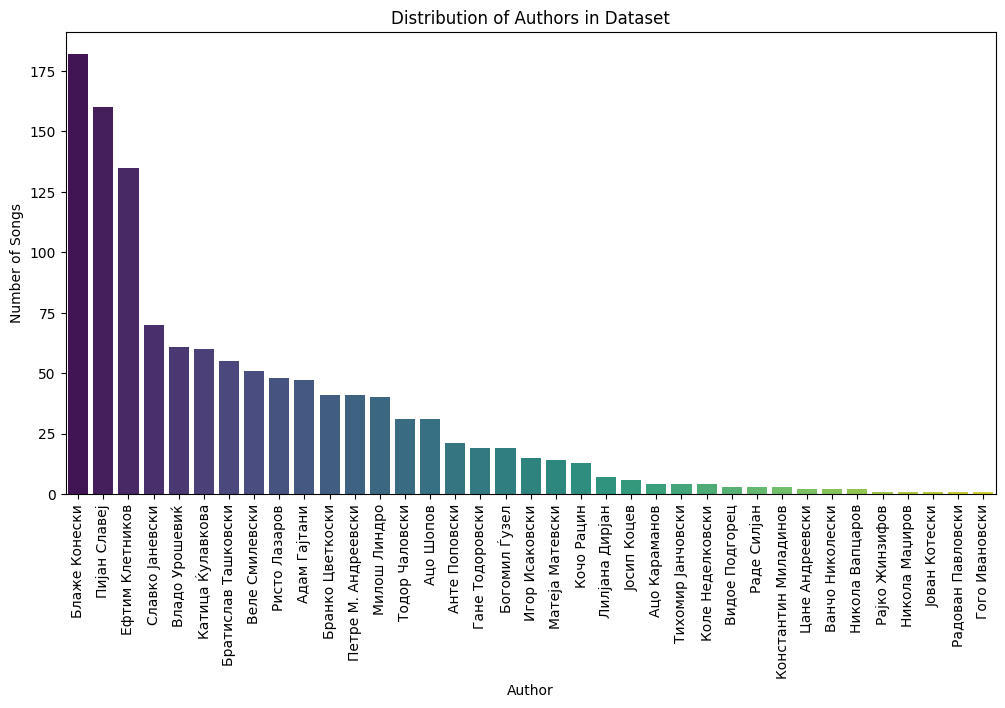

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


author_counts = df["author"].value_counts()

print(author_counts)
plt.figure(figsize=(12, 6))
sns.barplot(x=author_counts.index, y=author_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Author")
plt.ylabel("Number of Songs")
plt.title("Distribution of Authors in Dataset")
plt.show()


In [4]:
len_df=df.copy()

len_df['char_count']=len_df['song_text'].str.len()
result_char = len_df.groupby("author")[["char_count"]].sum().reset_index().sort_values('char_count',ascending=False) 
result_char
    

,author,char_count
6,Блаже Конески,85707
28,Пијан Славеј,58934
7,Богомил Ѓузел,57509
16,Ефтим Клетников,56526
33,Славко Јаневски,54619
18,Катица Ќулавкова,51382
27,Петре М. Андреевски,45774
13,Владо Урошевиќ,33942
2,Адам Гајтани,32600
32,Ристо Лазаров,29858


In [5]:
len_df['word_count']=len_df['song_text'].str.split().str.len()
result_word = len_df.groupby("author")[["word_count"]].sum().reset_index().sort_values('word_count',ascending=False) 
result_word
    

,author,word_count
6,Блаже Конески,15589
28,Пијан Славеј,10701
16,Ефтим Клетников,9769
7,Богомил Ѓузел,9708
33,Славко Јаневски,9350
18,Катица Ќулавкова,8237
27,Петре М. Андреевски,8205
13,Владо Урошевиќ,5425
2,Адам Гајтани,5331
32,Ристо Лазаров,4763


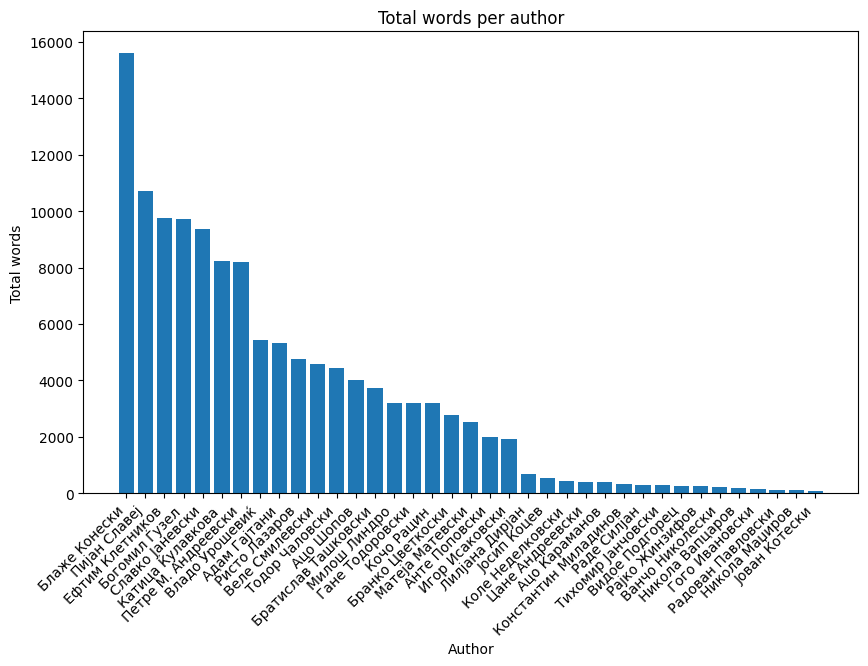

In [6]:
plt.figure(figsize=(10,6))
plt.bar(result_word["author"], result_word["word_count"])
plt.title("Total words per author")
plt.xlabel("Author")
plt.ylabel("Total words")
plt.xticks(rotation=45,ha='right')
plt.show()

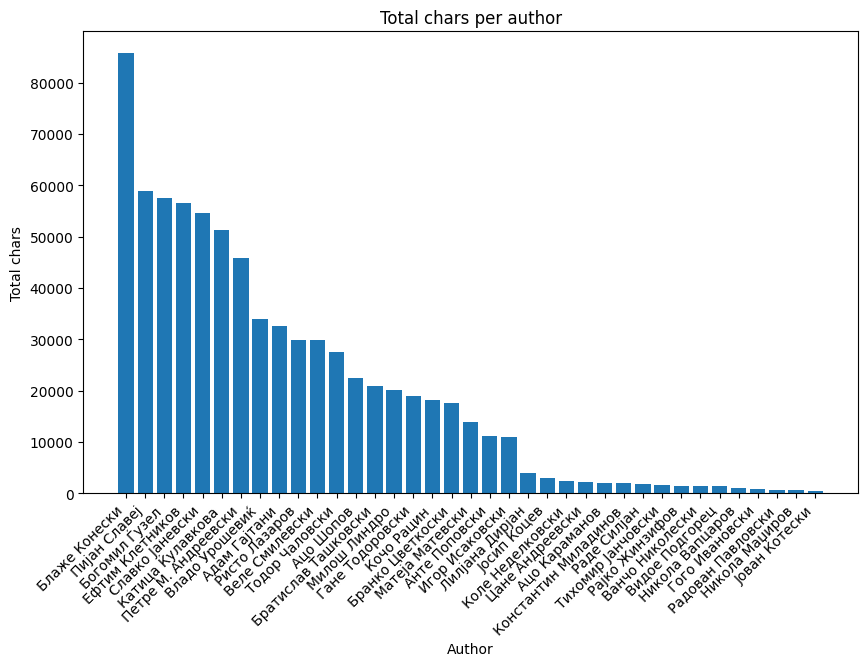

In [7]:
plt.figure(figsize=(10,6))
plt.bar(result_char["author"], result_char["char_count"])
plt.title("Total chars per author")
plt.xlabel("Author")
plt.ylabel("Total chars")
plt.xticks(rotation=45,ha='right')
plt.show()

In [8]:
print(f'Word count described:\n{len_df['word_count'].describe()}')
print(f'Total word count: {len_df['word_count'].sum()}')

Word count described:
count    1199.000000
mean      106.363636
std        97.029862
min         1.000000
25%        58.000000
50%        83.000000
75%       118.500000
max      1240.000000
Name: word_count, dtype: float64
Total word count: 127530


In [9]:
print(f'Char count described:\n{len_df['char_count'].describe()}')
print(f'Total char count: {len_df['char_count'].sum()}')

Char count described:
count    1199.000000
mean      621.750626
std       565.858197
min        57.000000
25%       329.000000
50%       492.000000
75%       703.500000
max      7430.000000
Name: char_count, dtype: float64
Total char count: 745479


Testing  of the models.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm

def preprocess_data(df, test_size=0.3, random_state=47, min_samples=2):
    author_counts = df['author'].value_counts()
    valid_authors = author_counts[author_counts >= min_samples].index
    df_filtered = df[df['author'].isin(valid_authors)]
    df_filtered['song_text']=df_filtered['song_text'].str.lower()
    if len(df_filtered) < 2:
        raise ValueError("After filtering, dataset is too small for splitting")
    
    train, test = train_test_split(df_filtered, test_size=test_size, random_state=random_state, stratify=df_filtered['author'])
    train_x, train_y = train['song_text'], train['author']
    test_x, test_y = test['song_text'], test['author']
    print(f"Training samples: {len(train_x)}, Test samples: {len(test_x)}")
    print(f"Author distribution:\n{author_counts[valid_authors]}")
    
    vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), min_df=2, max_df=0.8)
    X_train = vectorizer.fit_transform(train_x).toarray()
    X_test = vectorizer.transform(test_x).toarray()
    
    label_encoder = LabelEncoder()
    label_encoder.fit(df_filtered['author'])
    train_y_encoded = label_encoder.transform(train_y)
    mask = test_y.isin(train_y)
    X_test = X_test[mask.values]
    test_y = test_y[mask]
    test_y_encoded = label_encoder.transform(test_y)
    
    return X_train, X_test, train_y_encoded, test_y_encoded, label_encoder, vectorizer

def objective(trial):
    n_layers = trial.suggest_int("n_layers", 1, 10)  
    neurons = trial.suggest_categorical("neurons", [64, 128, 256, 512])
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "elu"])
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5)
    optimizer_name = trial.suggest_categorical("optimizer", ["adam", "rmsprop", "sgd"])
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)
    l2_reg = trial.suggest_float("l2_reg", 1e-5, 1e-2, log=True)  
    n_epochs=trial.suggest_int("n_epochs", 10, 100)  

    n_folds = 3  
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=47)
    f1_scores = []

    for train_idx, val_idx in kf.split(X_train, train_y_encoded):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = train_y_encoded[train_idx], train_y_encoded[val_idx]

  
        model = keras.Sequential()
        model.add(layers.Input(shape=(X_train.shape[1],)))
        for _ in range(n_layers):
            model.add(layers.Dense(neurons, activation=activation, kernel_regularizer=regularizers.l2(l2_reg)))
            model.add(layers.Dropout(dropout_rate))  # Dropout after each layer
        model.add(layers.Dense(num_classes, activation="softmax"))

    
        if optimizer_name == "adam":
            optimizer = keras.optimizers.Adam(learning_rate=lr)
        elif optimizer_name == "rmsprop":
            optimizer = keras.optimizers.RMSprop(learning_rate=lr)
        else:
            optimizer = keras.optimizers.SGD(learning_rate=lr)

        model.compile(
            optimizer=optimizer,
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"]
        )

  
        early_stopping = keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )

        
        model.fit(
            X_tr, y_tr,
            validation_data=(X_val, y_val),
            epochs=n_epochs,  
            batch_size=32,
            callbacks=[early_stopping],
        )

        y_pred = np.argmax(model.predict(X_val, verbose=0), axis=1)
        f1 = f1_score(y_val, y_pred, average="weighted")
        f1_scores.append(f1)

    return np.mean(f1_scores)


X_train, X_test, train_y_encoded, test_y_encoded, label_encoder, vectorizer = preprocess_data(df)
num_classes = len(label_encoder.classes_)


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50,n_jobs=-1)  

print("Best F1 Score:", study.best_value)
print("Best hyperparameters:", study.best_params)


best_params = study.best_params
model = keras.Sequential()
model.add(layers.Input(shape=(X_train.shape[1],)))
for _ in range(best_params['n_layers']):
    model.add(layers.Dense(best_params['neurons'], activation=best_params['activation'], kernel_regularizer=regularizers.l2(best_params['l2_reg'])))
    model.add(layers.Dropout(best_params['dropout_rate']))
model.add(layers.Dense(num_classes, activation="softmax"))

if best_params['optimizer'] == "adam":
    optimizer = keras.optimizers.Adam(learning_rate=best_params['lr'])
elif best_params['optimizer'] == "rmsprop":
    optimizer = keras.optimizers.RMSprop(learning_rate=best_params['lr'])
else:
    optimizer = keras.optimizers.SGD(learning_rate=best_params['lr'])

model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history=model.fit(
    X_train, train_y_encoded,
    validation_data=(X_test, test_y_encoded),
    epochs=best_params['n_epochs'],
    batch_size=32,
    callbacks=[early_stopping],
)

y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
cm = confusion_matrix(test_y_encoded, y_pred, normalize='true')

num_classes = len(label_encoder.classes_)
figsize = (max(15, num_classes * 0.8), max(12, num_classes * 0.8))  
annot_font_size = max(6, 12 - num_classes * 0.15)  
label_font_size = max(8, 14 - num_classes * 0.15)  

wrapped_labels = [textwrap.fill(label, 15) for label in label_encoder.classes_]


cm = confusion_matrix(test_y_encoded, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdBu_r",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



[I 2025-09-24 21:22:04,425] A new study created in memory with name: no-name-4fbc2158-10fe-4d68-9c57-157a267d99b8


Training samples: 835, Test samples: 359
Author distribution:
author
Блаже Конески           182
Пијан Славеј            160
Ефтим Клетников         135
Славко Јаневски          70
Владо Урошевиќ           61
Катица Ќулавкова         60
Братислав Ташковски      55
Веле Смилевски           51
Ристо Лазаров            48
Адам Гајтани             47
Бранко Цветкоски         41
Петре М. Андреевски      41
Милош Линдро             40
Тодор Чаловски           31
Ацо Шопов                31
Анте Поповски            21
Гане Тодоровски          19
Богомил Ѓузел            19
Игор Исаковски           15
Матеја Матевски          14
Кочо Рацин               13
Лилјана Дирјан            7
Јосип Коцев               6
Ацо Караманов             4
Тихомир Јанчовски         4
Коле Неделковски          4
Видое Подгорец            3
Раде Силјан               3
Константин Миладинов      3
Цане Андреевски           2
Ванчо Николески           2
Никола Вапцаров           2
Name: count, dtype: int64
Epoch 1/6

KeyboardInterrupt: 

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.0576 - loss: 3.6868 - val_accuracy: 0.1362 - val_loss: 3.6290
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.0809 - loss: 3.6257 - val_accuracy: 0.1075 - val_loss: 3.6257
 8/18 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.8941 - loss: 3.4316Epoch 37/72
Epoch 29/81
15/18 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.1077 - loss: 3.6200

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.1580 - loss: 2.5742 - val_accuracy: 0.1439 - val_loss: 2.8093
 8/18 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.9045 - loss: 1.0353Epoch 6/62
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.7110 - loss: 3.4546 - val_accuracy: 0.3165 - val_loss: 6.9040
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.1205 - loss: 3.6173 - val_accuracy: 0.1075 - val_loss: 3.6135
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - accuracy: 0.6691 - loss: 2.4123 - val_accuracy: 0.3871 - val_loss: 3.3069
13/18 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.0827 - loss: 3.6242Epoch 34/63
Epoch 19/92
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.0665 - loss: 8.6325 - val_accuracy: 0.0824 - val_loss: 8.6315
16/18 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.0441 - loss: 3.7133Epoch 36/64
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.0754 - loss: 8.7946 - val_accuracy: 0.0504 - val_loss: 16.8534
 3/18 ━━━━━━━━━━━━━━━━━━━━ 1s 

[W 2025-09-24 21:23:37,391] Trial 0 failed with parameters: {'n_layers': 8, 'neurons': 512, 'activation': 'relu', 'dropout_rate': 0.2600139787195963, 'optimizer': 'adam', 'lr': 0.00019451164038084438, 'l2_reg': 4.65290829223799e-05, 'n_epochs': 23} because of the following error: ZMQError('Socket operation on non-socket').
Traceback (most recent call last):
  File "/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/optuna/study/_optimize.py", line 201, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/tmp/ipykernel_496441/714868014.py", line 92, in objective
    model.fit(
  File "/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/ipykernel/iostream.py", line 694, in write
    self._schedule_flush()
  File "/home/ivan/Desktop/Diplomska/.

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.1493 - loss: 3.6086 - val_accuracy: 0.1183 - val_loss: 3.6059
 9/18 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.0135 - loss: 3.6829Epoch 42/63
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.2657 - loss: 3.0947 - val_accuracy: 0.1655 - val_loss: 3.2559
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8477 - loss: 1.4120

  File "/usr/lib/python3.12/logging/__init__.py", line 1164, in emit
    self.flush()


Epoch 7/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.5117 - loss: 2.2082 - val_accuracy: 0.2878 - val_loss: 3.2853
 1/18 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.2812 - loss: 3.6023Epoch 5/65
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.0935 - loss: 3.6253 - val_accuracy: 0.1147 - val_loss: 3.6209
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.9406 - loss: 0.7134 - val_accuracy: 0.4982 - val_loss: 2.2849
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.8615 - loss: 2.8964 - val_accuracy: 0.3692 - val_loss: 6.4960
Epoch 40/53
13/18 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.0157 - loss: 3.6904Epoch 24/97
Epoch 46/72
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.0809 - loss: 8.6288 - val_accuracy: 0.1075 - val_loss: 8.6273
 6/18 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.2076 - loss: 3.6083Epoch 44/64
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.8725 - loss: 1.3388 - val_accuracy: 0.3957 - val_loss: 2.9708
 8/18 ━━━

[I 2025-09-24 21:24:01,644] Trial 3 finished with value: 0.3457418585661622 and parameters: {'n_layers': 6, 'neurons': 256, 'activation': 'elu', 'dropout_rate': 0.3202460020991145, 'optimizer': 'adam', 'lr': 0.0037494136111000946, 'l2_reg': 0.0006780456341694687, 'n_epochs': 100}. Best is trial 3 with value: 0.3457418585661622.


Epoch 9/82
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.6984 - loss: 1.9685 - val_accuracy: 0.3669 - val_loss: 2.8585
 1/18 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.1250 - loss: 2.8628Epoch 20/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.0628 - loss: 11.4870 - val_accuracy: 0.1547 - val_loss: 9.2563
13/18 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.0645 - loss: 8.6221Epoch 11/87
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.1079 - loss: 3.6132 - val_accuracy: 0.1254 - val_loss: 3.6134
 1/18 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.0625 - loss: 9.4541Epoch 60/72
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.1331 - loss: 3.5977 - val_accuracy: 0.1326 - val_loss: 3.5937
15/18 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.1269 - loss: 2.8370Epoch 55/63
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.1293 - loss: 2.5704 - val_accuracy: 0.1691 - val_loss: 2.9286
 9/18 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.0610 - loss

[I 2025-09-24 21:24:05,723] Trial 13 finished with value: 0.04346151281661186 and parameters: {'n_layers': 6, 'neurons': 256, 'activation': 'elu', 'dropout_rate': 0.45092543741835966, 'optimizer': 'rmsprop', 'lr': 0.009915423555342815, 'l2_reg': 0.00991789648885926, 'n_epochs': 87}. Best is trial 3 with value: 0.3457418585661622.


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.1529 - loss: 3.5929 - val_accuracy: 0.1362 - val_loss: 3.5918
Epoch 57/63
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.1598 - loss: 2.8931 - val_accuracy: 0.1367 - val_loss: 2.9443
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.1313 - loss: 3.6149Epoch 12/82
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.9928 - loss: 0.5851 - val_accuracy: 0.4568 - val_loss: 2.5615
 4/18 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.0827 - loss: 3.6136Epoch 22/82
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.1187 - loss: 8.6204 - val_accuracy: 0.1434 - val_loss: 8.6196
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.1903 - loss: 2.3694 - val_accuracy: 0.0504 - val_loss: 3.1548
Epoch 8/62
Epoch 59/64
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.7504 - loss: 1.8299 - val_accuracy: 0.4137 - val_loss: 2.8135
16/18 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.9946 - loss: 1.8410Epoch 23/32
18/18 ━━━━━━━

[I 2025-09-24 21:24:11,305] Trial 5 finished with value: 0.05068536647160873 and parameters: {'n_layers': 7, 'neurons': 512, 'activation': 'relu', 'dropout_rate': 0.31974070774951535, 'optimizer': 'rmsprop', 'lr': 0.0011077221142982928, 'l2_reg': 1.2548408821440914e-05, 'n_epochs': 62}. Best is trial 3 with value: 0.3457418585661622.


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.0989 - loss: 3.6139 - val_accuracy: 0.1326 - val_loss: 3.6102
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.8133 - loss: 1.6942 - val_accuracy: 0.4209 - val_loss: 2.7871
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9946 - loss: 1.6842 - val_accuracy: 0.5000 - val_loss: 3.8441
10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.0763 - loss: 4.5681Epoch 14/84
Epoch 66/72
Epoch 26/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.0450 - loss: 3.6778 - val_accuracy: 0.1290 - val_loss: 3.5922
 7/18 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.1965 - loss: 3.5904Epoch 55/81
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9928 - loss: 0.5360 - val_accuracy: 0.4604 - val_loss: 2.5934
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0979 - loss: 3.6161Epoch 26/82
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.0934 - loss: 4.5511 - val_accuracy: 0.1367 - val_loss: 4.3875
Epoch 3/92
18/18 ━━━━━━━━

Analysis, tryint to calculate author effectivness.

In [11]:

results_df = df.groupby('author').agg(
    char_count=('song_text', lambda x: x.str.len().sum()),
    word_count=('song_text', lambda x: x.str.split().str.len().sum()),
    num_songs=('song_text', 'count')
).reset_index()

f1_dict = dict(zip(authors, f1_per_author))

results_df['f1_score'] = results_df['author'].map(f1_dict)

missing_f1 = results_df[results_df['f1_score'].isna()]['author'].tolist()
if missing_f1:
    print(f"Warning: No F1 scores for authors: {missing_f1}")

max_songs = results_df['num_songs'].max()
max_words = results_df['word_count'].max()
max_chars = results_df['char_count'].max()

results_df['norm_songs'] = results_df['num_songs'] / max_songs
results_df['norm_words'] = results_df['word_count'] / max_words
results_df['norm_chars'] = results_df['char_count'] / max_chars



results_df['expressiveness'] = results_df['f1_score'] / results_df['norm_words']

results_df['expressiveness'] = results_df['expressiveness'].replace([np.inf, -np.inf], np.nan)

if results_df['expressiveness'].notna().any():  
    expr_min = results_df['expressiveness'].min()
    expr_max = results_df['expressiveness'].max()
    if expr_max != expr_min: 
        results_df['expressiveness_normalized'] = (
            (results_df['expressiveness'] - expr_min) / (expr_max - expr_min)
        )
    else:
    
        results_df['expressiveness_normalized'] = 0
else:
    
    results_df['expressiveness_normalized'] = np.nan


results_df = results_df.sort_values(by='expressiveness_normalized', ascending=False, na_position='last')


results_df

NameError: name 'authors' is not defined

835
359
Epoch 1/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3653 - loss: 5.5221 - val_accuracy: 0.2925 - val_loss: 5.1787
Epoch 2/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9749 - loss: 2.0700 - val_accuracy: 0.3203 - val_loss: 4.4198
Epoch 3/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9964 - loss: 1.0679 - val_accuracy: 0.3120 - val_loss: 3.7502
Epoch 4/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9988 - loss: 0.5930 - val_accuracy: 0.3036 - val_loss: 3.3932
Epoch 5/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9964 - loss: 0.4146 - val_accuracy: 0.3092 - val_loss: 3.2065
Epoch 6/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.3315 - val_accuracy: 0.2869 - val_loss: 3.0809
Epoch 7/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9952 - loss: 0.2814 - val_accuracy: 0.3036 - val_loss: 2.9636
Epoch 8/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9964 - loss: 0.2698 - val_accuracy: 0.3008 - v

INFO:__main__:Јосип Коцев: F1 = 0.0000
INFO:__main__:Адам Гајтани: F1 = 0.6400
INFO:__main__:Анте Поповски: F1 = 0.6667
INFO:__main__:Ацо Караманов: F1 = 0.0000
INFO:__main__:Ацо Шопов: F1 = 0.5333
INFO:__main__:Блаже Конески: F1 = 0.6786
INFO:__main__:Богомил Ѓузел: F1 = 0.8333
INFO:__main__:Бранко Цветкоски: F1 = 0.5161
INFO:__main__:Братислав Ташковски: F1 = 0.5882
INFO:__main__:Ванчо Николески: F1 = 0.0000
INFO:__main__:Веле Смилевски: F1 = 0.5517
INFO:__main__:Видое Подгорец: F1 = 0.0000
INFO:__main__:Владо Урошевиќ: F1 = 0.7222
INFO:__main__:Гане Тодоровски: F1 = 0.6000
INFO:__main__:Ефтим Клетников: F1 = 0.6329
INFO:__main__:Игор Исаковски: F1 = 0.5714
INFO:__main__:Катица Ќулавкова: F1 = 0.4615
INFO:__main__:Коле Неделковски: F1 = 0.0000
INFO:__main__:Константин Миладинов: F1 = 0.0000
INFO:__main__:Кочо Рацин: F1 = 0.6667
INFO:__main__:Лилјана Дирјан: F1 = 0.0000
INFO:__main__:Матеја Матевски: F1 = 0.7500
INFO:__main__:Милош Линдро: F1 = 0.6667
INFO:__main__:Никола Вапцаров: F1

sum 359


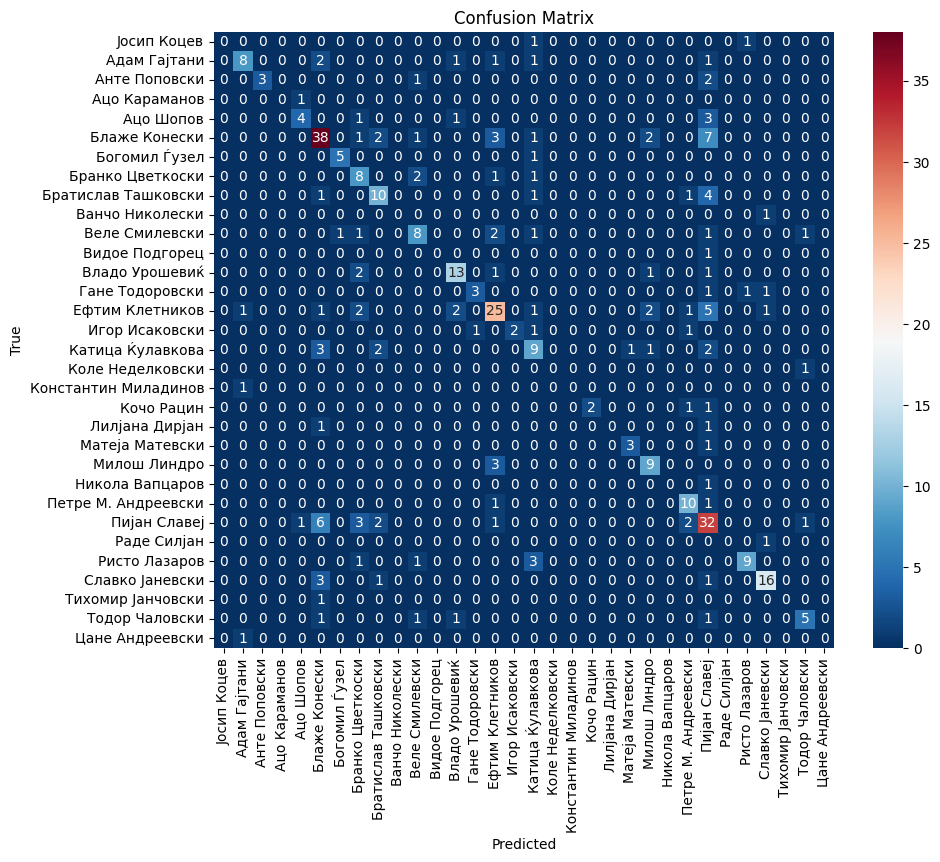

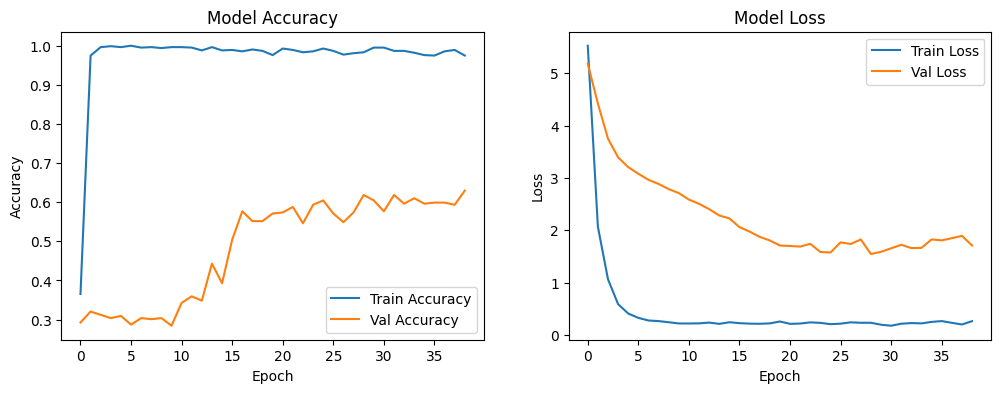

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import logging
import textwrap

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
def preprocess_data(df, test_size=0.3, random_state=47, min_samples=2):

    
    author_counts = df['author'].value_counts()
    valid_authors = author_counts[author_counts >= min_samples].index
    df_filtered = df[df['author'].isin(valid_authors)]
    
    if len(df_filtered) < 2:
        raise ValueError("After filtering, dataset is too small for splitting")
    
    
    train, test = train_test_split(df_filtered, test_size=test_size, random_state=random_state, stratify=df_filtered['author'])
    train_x, train_y = train['song_text'], train['author']
    test_x, test_y = test['song_text'], test['author']
    print(len(train_x))
    print(len(test_x))
    
    vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), min_df=2, max_df=0.8)
    X_train = vectorizer.fit_transform(train_x).toarray()
    X_test = vectorizer.transform(test_x).toarray()
    
   
    label_encoder = LabelEncoder()
    label_encoder.fit(df_filtered['author'])
    train_y_encoded = label_encoder.transform(train_y)
    mask = test_y.isin(train_y)
    X_test = X_test[mask.values]
    test_y_encoded = label_encoder.transform(test_y[mask])
    
    return X_train, X_test, train_y_encoded, test_y_encoded, label_encoder, vectorizer

def build_model(input_shape, num_classes, n_layers=1, neurons=256, activation='relu', dropout_rate= 0.12585953325685081, lr= 0.008932202078992958 ):
    model = keras.Sequential()
    model.add(layers.Input(shape=(input_shape,)))
    for _ in range(n_layers):
        model.add(layers.Dense(neurons, activation=activation, kernel_regularizer=regularizers.l2(0.01)))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(num_classes, activation='softmax'))
    optimizer = keras.optimizers.RMSprop(learning_rate=lr)
    model.compile(
        optimizer=keras.optimizers.RMSprop(learning_rate=lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


X_train, X_test, train_y_encoded, test_y_encoded, label_encoder, vectorizer = preprocess_data(df)
num_classes = len(label_encoder.classes_)

model = build_model(X_train.shape[1], num_classes, n_layers=1, neurons=256, activation='relu', dropout_rate=0.2, lr=0.001)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, train_y_encoded,
    validation_data=(X_test, test_y_encoded),
    epochs=97,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=0
)


y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
f1 = f1_score(test_y_encoded, y_pred, average='weighted')
f1_per_author = f1_score(test_y_encoded, y_pred, average=None)
for author, score in zip(label_encoder.classes_, f1_per_author):
    logger.info(f"{author}: F1 = {score:.4f}")
logger.info(f"Weighted F1 Score: {f1:.4f}")

cm = confusion_matrix(test_y_encoded, y_pred, normalize='true')


num_classes = len(label_encoder.classes_)
figsize = (max(15, num_classes * 0.8), max(12, num_classes * 0.8))  
annot_font_size = max(6, 12 - num_classes * 0.15)  
label_font_size = max(8, 14 - num_classes * 0.15)  


wrapped_labels = [textwrap.fill(label, 15) for label in label_encoder.classes_]


cm = confusion_matrix(test_y_encoded, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdBu_r",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import logging
import textwrap

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
def preprocess_data(df, test_size=0.3, random_state=47, min_samples=2):

    
    author_counts = df['author'].value_counts()
    valid_authors = author_counts[author_counts >= min_samples].index
    df_filtered = df[df['author'].isin(valid_authors)]
    
    if len(df_filtered) < 2:
        raise ValueError("After filtering, dataset is too small for splitting")
    
    
    train, test = train_test_split(df_filtered, test_size=test_size, random_state=random_state, stratify=df_filtered['author'])
    train_x, train_y = train['song_text'], train['author']
    test_x, test_y = test['song_text'], test['author']
    print(len(train_x))
    print(len(test_x))
    
    vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), min_df=2, max_df=0.8)
    X_train = vectorizer.fit_transform(train_x).toarray()
    X_test = vectorizer.transform(test_x).toarray()
    
   
    label_encoder = LabelEncoder()
    label_encoder.fit(df_filtered['author'])
    train_y_encoded = label_encoder.transform(train_y)
    mask = test_y.isin(train_y)
    X_test = X_test[mask.values]
    test_y_encoded = label_encoder.transform(test_y[mask])
    
    return X_train, X_test, train_y_encoded, test_y_encoded, label_encoder, vectorizer

def build_model(input_shape, num_classes, n_layers=1, neurons=256, activation='relu', dropout_rate= 0.12585953325685081, lr= 0.008932202078992958 ):
    model = keras.Sequential()
    model.add(layers.Input(shape=(input_shape,)))
    for _ in range(n_layers):
        model.add(layers.Dense(neurons, activation=activation, kernel_regularizer=regularizers.l2(0.01)))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(num_classes, activation='softmax'))
    optimizer = keras.optimizers.RMSprop(learning_rate=lr)
    model.compile(
        optimizer=keras.optimizers.RMSprop(learning_rate=lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


X_train, X_test, train_y_encoded, test_y_encoded, label_encoder, vectorizer = preprocess_data(df)
num_classes = len(label_encoder.classes_)

model = build_model(X_train.shape[1], num_classes, n_layers=1, neurons=256, activation='relu', dropout_rate=0.2, lr=0.001)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, train_y_encoded,
    validation_data=(X_test, test_y_encoded),
    epochs=97,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=0
)


y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
f1 = f1_score(test_y_encoded, y_pred, average='weighted')
f1_per_author = f1_score(test_y_encoded, y_pred, average=None)
for author, score in zip(label_encoder.classes_, f1_per_author):
    logger.info(f"{author}: F1 = {score:.4f}")
logger.info(f"Weighted F1 Score: {f1:.4f}")

cm = confusion_matrix(test_y_encoded, y_pred, normalize='true')


num_classes = len(label_encoder.classes_)
figsize = (max(15, num_classes * 0.8), max(12, num_classes * 0.8))  
annot_font_size = max(6, 12 - num_classes * 0.15)  
label_font_size = max(8, 14 - num_classes * 0.15)  


wrapped_labels = [textwrap.fill(label, 15) for label in label_encoder.classes_]


cm = confusion_matrix(test_y_encoded, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdBu_r",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()